In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import matplotlib.pyplot as plt
import warnings

plt.rc('font', family='NanumBarunGothic')
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

# 여기부터 모델링 진행

In [5]:
tun_data = pd.read_csv("/content/drive/MyDrive/최종프로젝트_ AI엔지니어링/유저분류 클러스터링 최종 정리/data/BaseLine_User_Information_data.csv")
tun_data

,ID,비밀번호,성별,나이,직장,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%)
0,user1,1234,남자,60대,Y,383,5036.764706,4110.0,926.764706,2446,5074.0,12556.764706,40.408498
1,user2,1234,여자,30대,Y,383,2392.857143,1474.0,918.857143,2002,9443.0,13837.857143,68.240334
2,user3,1234,남자,40대,Y,577,2206.802721,1622.0,584.802721,1323,3441.0,6970.802721,49.363038
3,user4,1234,남자,60대,Y,383,1528.186275,1247.0,281.186275,4707,4490.0,10725.186275,41.864075
4,user5,1234,여자,30대,Y,383,2358.766234,1453.0,905.766234,617,5030.0,8005.766234,62.829714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86304,user86305,1234,남자,40대,N,223,4082.000000,3822.0,260.000000,3193,7337.0,14612.000000,50.212154
86305,user86306,1234,여자,30대,Y,266,2687.000000,1190.0,1497.000000,1177,11316.0,15180.000000,74.545455
86306,user86307,1234,남자,50대,Y,587,4202.000000,2706.0,1496.000000,3112,15082.0,22396.000000,67.342383
86307,user86308,1234,여자,40대,Y,285,4054.000000,2603.0,1451.000000,1112,5341.0,10507.000000,50.832778


In [6]:
# 나이 변수 수치형으로 변환
tun_data['나이'] = tun_data['나이'].replace({'20대': 20, '30대': 30, '40대': 40, '50대': 50, '60대': 60})

In [7]:
# 순자산 (금융자산 총액 - 부채액)
tun_data['순자산'] = tun_data['금융자산 총액'] - tun_data['부채액']

In [8]:
tun_data

,ID,비밀번호,성별,나이,직장,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),순자산
0,user1,1234,남자,60,Y,383,5036.764706,4110.0,926.764706,2446,5074.0,12556.764706,40.408498,7482.764706
1,user2,1234,여자,30,Y,383,2392.857143,1474.0,918.857143,2002,9443.0,13837.857143,68.240334,4394.857143
2,user3,1234,남자,40,Y,577,2206.802721,1622.0,584.802721,1323,3441.0,6970.802721,49.363038,3529.802721
3,user4,1234,남자,60,Y,383,1528.186275,1247.0,281.186275,4707,4490.0,10725.186275,41.864075,6235.186275
4,user5,1234,여자,30,Y,383,2358.766234,1453.0,905.766234,617,5030.0,8005.766234,62.829714,2975.766234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86304,user86305,1234,남자,40,N,223,4082.000000,3822.0,260.000000,3193,7337.0,14612.000000,50.212154,7275.000000
86305,user86306,1234,여자,30,Y,266,2687.000000,1190.0,1497.000000,1177,11316.0,15180.000000,74.545455,3864.000000
86306,user86307,1234,남자,50,Y,587,4202.000000,2706.0,1496.000000,3112,15082.0,22396.000000,67.342383,7314.000000
86307,user86308,1234,여자,40,Y,285,4054.000000,2603.0,1451.000000,1112,5341.0,10507.000000,50.832778,5166.000000


In [9]:
tun_data.to_csv('유저데이터+순자산.csv', index=False)

## BaseLine clustering

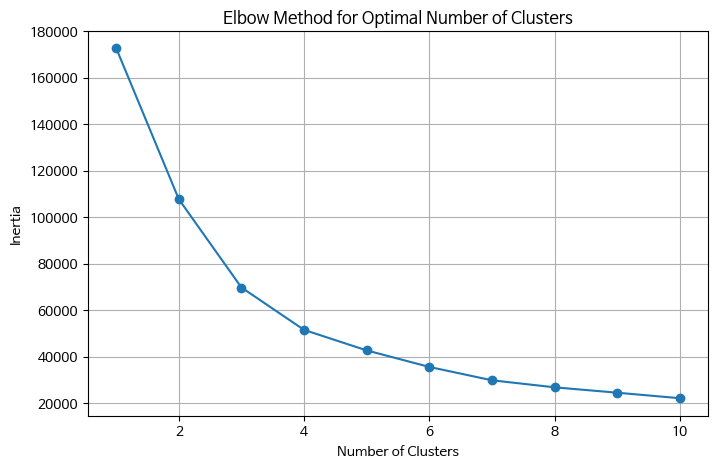

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract relevant columns for clustering
clustering_data = tun_data[['순자산', '부채액']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 수 지정
optimal_clusters = 4

# K-means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, max_iter=300)
tun_data['Cluster'] = kmeans.fit_predict(scaled_data)

# 분류된 클러스터 확인
data_with_clusters = tun_data[['ID','부채액', '순자산', 'Cluster']]

In [12]:
data_with_clusters

,ID,부채액,순자산,Cluster
0,user1,5074.0,7482.764706,2
1,user2,9443.0,4394.857143,3
2,user3,3441.0,3529.802721,1
3,user4,4490.0,6235.186275,2
4,user5,5030.0,2975.766234,1
...,...,...,...,...
86304,user86305,7337.0,7275.000000,2
86305,user86306,11316.0,3864.000000,3
86306,user86307,15082.0,7314.000000,0
86307,user86308,5341.0,5166.000000,2


In [13]:
data_with_clusters[data_with_clusters['ID'] == 'user2']

,ID,부채액,순자산,Cluster
1,user2,9443.0,4394.857143,3


In [14]:
# Centroids 데이터를 자연수로 변환
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=clustering_data.columns
)

# Cluster 열 추가
centroids['Cluster'] = centroids.index

# 각 숫자를 자연수로 변환 (반올림 후 정수로 변환)
centroids = centroids.round(0).astype(int)

# 변환된 데이터 출력
print(centroids)

    순자산    부채액  Cluster
0  7007  12765        0
1  3290   5006        1
2  6910   5622        2
3  3581  11313        3


DB에 있는 데이터로 클러스터링

0: 고자산 고부채

1: 저자산 저부채

2: 고자산 저부채

3: 저자산 고부채

In [15]:
data_with_clusters['Cluster'].value_counts()

,count
Cluster,
1,24076
3,22587
2,21542
0,18104


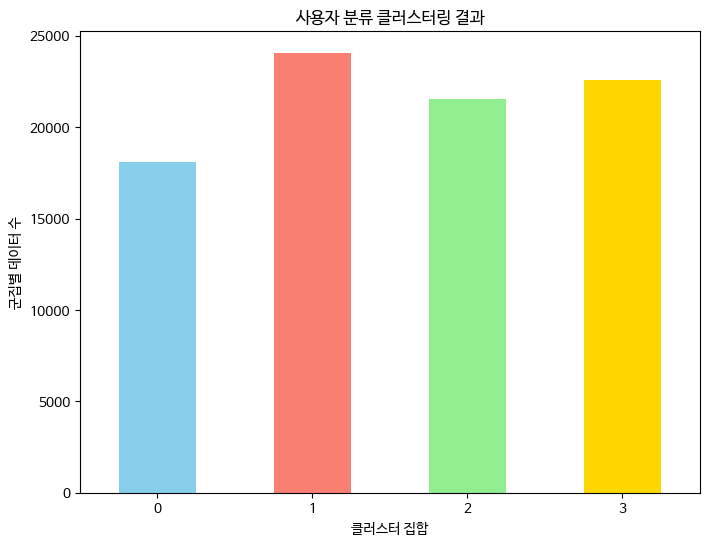

In [16]:
# prompt: data_with_clusters['Cluster'].value_counts() 이 코드의 결과를 막대그래프로 시각화 하는 코드

import matplotlib.pyplot as plt

# Assuming data_with_clusters is already defined as in your provided code
cluster_counts = data_with_clusters['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.title('사용자 분류 클러스터링 결과')
plt.xlabel('클러스터 집합')
plt.ylabel('군집별 데이터 수')
plt.xticks(rotation=0)  #
plt.show()

In [17]:
import joblib

# K-means 모델 저장
joblib.dump(kmeans, '부채액_순자산_Clustering.pkl')

print("K-means 모델이 '부채액_순자산_Clustering.pkl' 파일로 저장되었습니다.")

K-means 모델이 '부채액_순자산_Clustering.pkl' 파일로 저장되었습니다.


In [18]:
import joblib

# .pkl 파일 로드
model = joblib.load('부채액_순자산_Clustering.pkl')

# 모델 출력
model

KMeans(n_clusters=4, random_state=42)

In [19]:
import joblib

# .pkl 파일 로드
file_path = '부채액_순자산_Clustering.pkl'  # 열려는 .pkl 파일 경로
loaded_model = joblib.load(file_path)

# 모델 객체 확인 (예: KMeans 모델 정보 출력)
print(loaded_model)


KMeans(n_clusters=4, random_state=42)


In [20]:
print(type(loaded_model))  # 객체의 유형 확인
print(dir(loaded_model))   # 객체의 속성 확인

<class 'sklearn.cluster._kmeans.KMeans'>
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_algorithm', '_build_request_for_signature', '_check_feature_names', '_check_mkl_vcomp', '_check_n_features', '_check_params_vs_input', '_check_test_data', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_init_centroids', '_more_tags', '_n_features_out', '_n_init', '_n_threads', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_re

In [21]:
# 클러스터링 결과가 저장된 데이터 확인
from sklearn.metrics import silhouette_score

cluster_labels = tun_data['Cluster']

# 실루엣 계수 계산
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"BaseLine K-means 모델의 평균 실루엣 계수: {silhouette_avg:.4f}")

BaseLine K-means 모델의 평균 실루엣 계수: 0.3620


# 연령별로 따로 분류해서 클러스터링 모델을 구축해보자

- 자산 현황을 알려줄 때 전체 연령대에서 군집을 이루는 것보단 같은 연령대에서 비교를 해서 군집을 만드는 것이 더 정확하다고 판단했고 성능 또한 높아질 것이라는 생각이 들었기 때문이다.



In [22]:
# 위에서 저장한 데이터를 불러오고 재정안정성지수라는 파생변수 추가

file_path = "/content/유저데이터+순자산.csv"
data = pd.read_csv(file_path)
data['재정안정성지수'] = data['부채액'] - data['순자산']

In [23]:
# Reload necessary libraries and data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

# 연령대별로 데이터 분리
data['Age Group'] = (data['나이'] // 10) * 10  # e.g., 20, 30, 40, etc.

# 결과 저장을 위한 딕셔너리 생성
age_group_clusters = {}

# Loop through unique age groups and perform clustering
for age_group in sorted(data['Age Group'].unique()):
    # Filter data for the specific age group
    group_data = data[data['Age Group'] == age_group]

    # Extract relevant columns for clustering
    clustering_data = group_data[['부채액', '순자산']]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clustering_data)

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000, init='k-means++', n_init=20)  # Using 3 clusters as an example
    group_data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Store results
    age_group_clusters[age_group] = group_data

    model_filename = f"kmeans_model_age_group_{age_group}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(kmeans, file)
    print(f"연령대 {age_group}의 K-Means 모델이 저장되었습니다: {model_filename}")

연령대 20의 K-Means 모델이 저장되었습니다: kmeans_model_age_group_20.pkl
연령대 30의 K-Means 모델이 저장되었습니다: kmeans_model_age_group_30.pkl
연령대 40의 K-Means 모델이 저장되었습니다: kmeans_model_age_group_40.pkl
연령대 50의 K-Means 모델이 저장되었습니다: kmeans_model_age_group_50.pkl
연령대 60의 K-Means 모델이 저장되었습니다: kmeans_model_age_group_60.pkl


In [24]:
from sklearn.metrics import silhouette_score

# 각 연령대에 대한 실루엣 점수를 저장할 딕셔너리
silhouette_scores = {}

# 각 연령대에 대해 실루엣 점수 계산
for age_group, group_data in age_group_clusters.items():
    # 클러스터링에 사용된 변수와 클러스터 레이블 추출
    clustering_features = group_data[['부채액', '순자산']]
    cluster_labels = group_data['Cluster']

    # 데이터 표준화
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(clustering_features)

    # 실루엣 점수 계산
    if len(cluster_labels.unique()) > 1:  # 클러스터가 2개 이상인 경우에만 계산 가능
        silhouette_avg = silhouette_score(scaled_features, cluster_labels)
        silhouette_scores[age_group] = silhouette_avg
    else:
        silhouette_scores[age_group] = None  # 클러스터가 1개인 경우 점수 계산 불가

# 각 연령대에 대한 실루엣 점수 출력
for age_group, score in silhouette_scores.items():
    if score is not None:
        print(f"연령대 {age_group}의 실루엣 점수: {score:.4f}")
    else:
        print(f"연령대 {age_group}의 실루엣 점수: 계산 불가 (클러스터가 1개)")

연령대 20의 실루엣 점수: 0.3690
연령대 30의 실루엣 점수: 0.3693
연령대 40의 실루엣 점수: 0.3662
연령대 50의 실루엣 점수: 0.3663
연령대 60의 실루엣 점수: 0.3640


In [25]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# 각 연령대에 대한 Calinski-Harabasz Index와 Davies-Bouldin Index를 저장할 딕셔너리
calinski_harabasz_indices = {}
davies_bouldin_indices = {}

# 각 연령대에 대해 지표 계산
for age_group, group_data in age_group_clusters.items():
    # 클러스터링에 사용된 변수와 클러스터 레이블 추출
    clustering_features = group_data[['부채액', '순자산']]
    cluster_labels = group_data['Cluster']

    # 데이터 표준화
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(clustering_features)

    # Calinski-Harabasz Index 계산
    calinski_harabasz_indices[age_group] = calinski_harabasz_score(scaled_features, cluster_labels)

    # Davies-Bouldin Index 계산
    davies_bouldin_indices[age_group] = davies_bouldin_score(scaled_features, cluster_labels)

# 각 연령대에 대한 지표 출력
for age_group in sorted(age_group_clusters.keys()):
    print(f"연령대 {age_group}:")
    print(f"  Calinski-Harabasz Index: {calinski_harabasz_indices[age_group]:.4f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin_indices[age_group]:.4f}")

연령대 20:
  Calinski-Harabasz Index: 10479.2291
  Davies-Bouldin Index: 0.8664
연령대 30:
  Calinski-Harabasz Index: 14612.4020
  Davies-Bouldin Index: 0.8411
연령대 40:
  Calinski-Harabasz Index: 16528.8213
  Davies-Bouldin Index: 0.8484
연령대 50:
  Calinski-Harabasz Index: 18065.2483
  Davies-Bouldin Index: 0.8505
연령대 60:
  Calinski-Harabasz Index: 8475.4509
  Davies-Bouldin Index: 0.8514


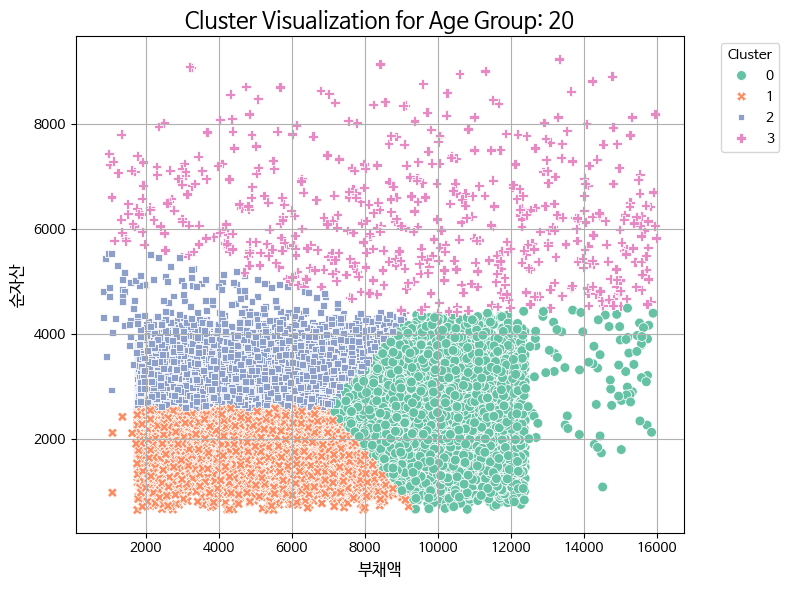

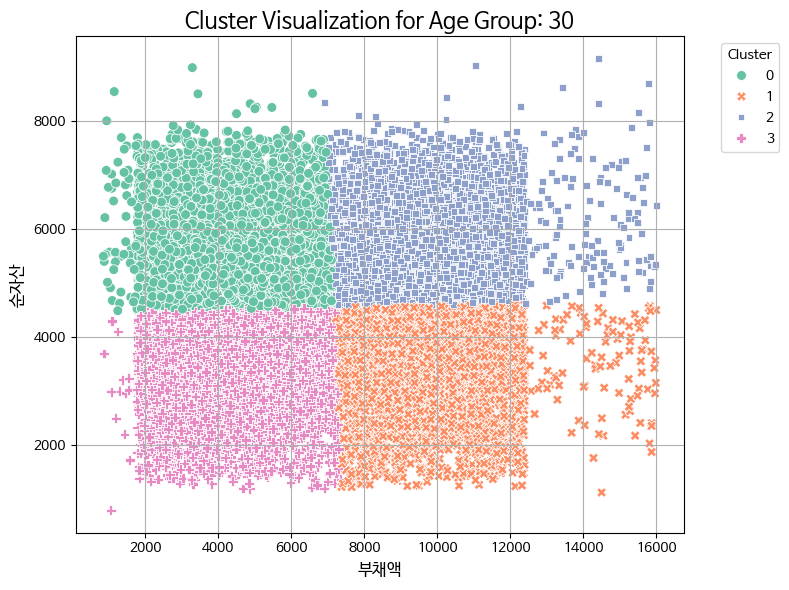

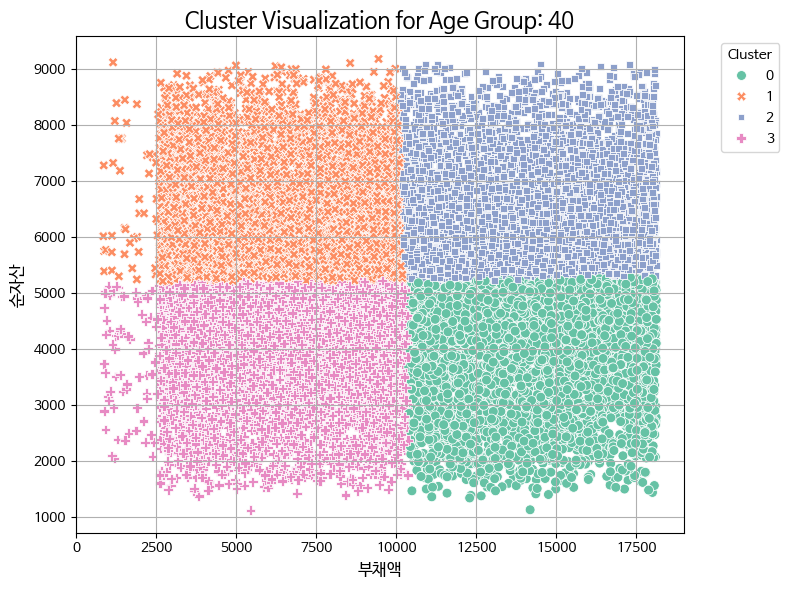

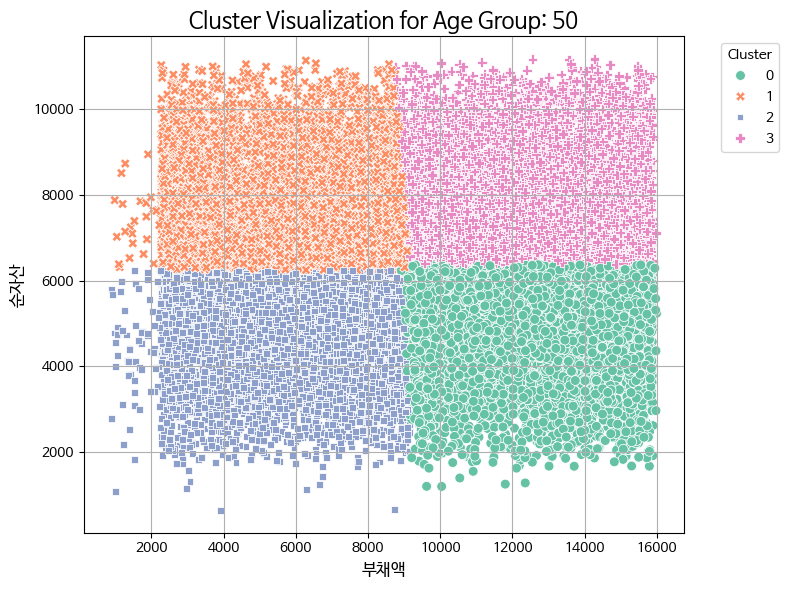

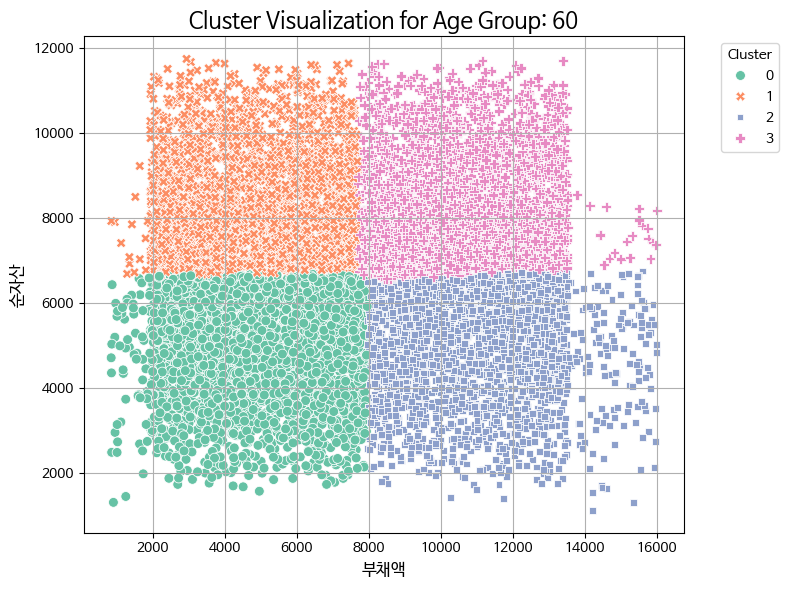

In [26]:
# 각 연령대별 클러스터링 결과 시각화
for age_group, group_data in age_group_clusters.items():
    plt.figure(figsize=(8, 6))

    # 클러스터 산점도 그리기
    sns.scatterplot(
        data=group_data,
        x='부채액',
        y= '순자산',
        hue='Cluster',
        palette='Set2',
        style='Cluster',
        s=50
    )

    # 그래프 제목과 축 레이블
    plt.title(f"Cluster Visualization for Age Group: {age_group}", fontsize=16)
    plt.xlabel('부채액', fontsize=12)
    plt.ylabel('순자산', fontsize=12)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()

    # 그래프 출력
    plt.show()


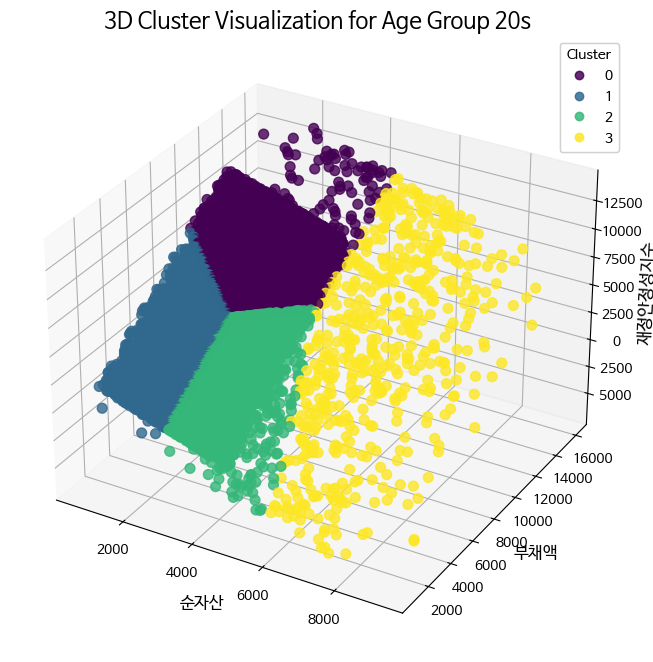

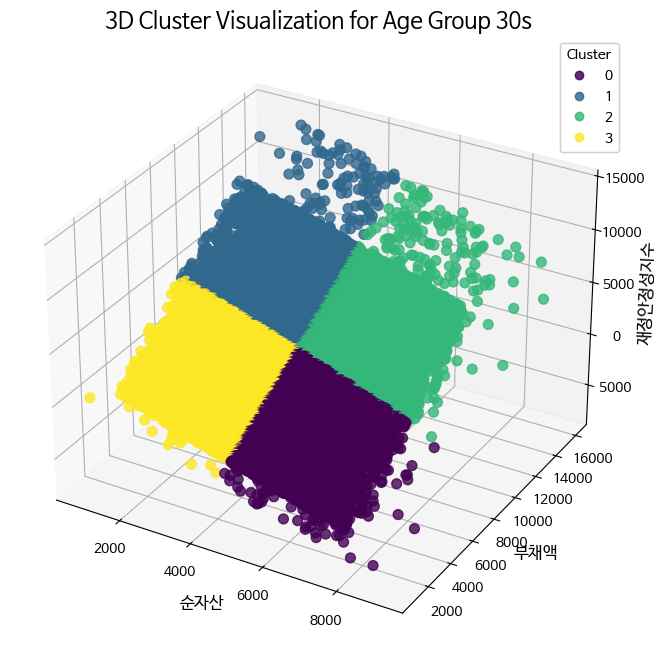

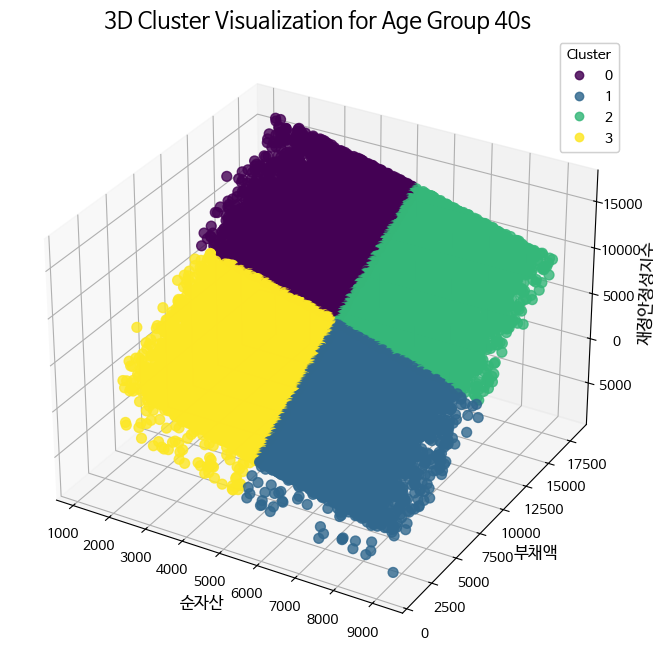

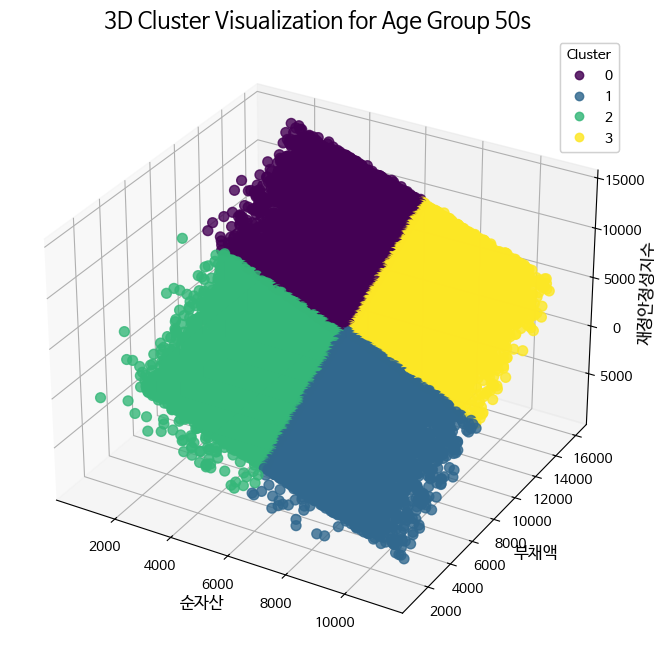

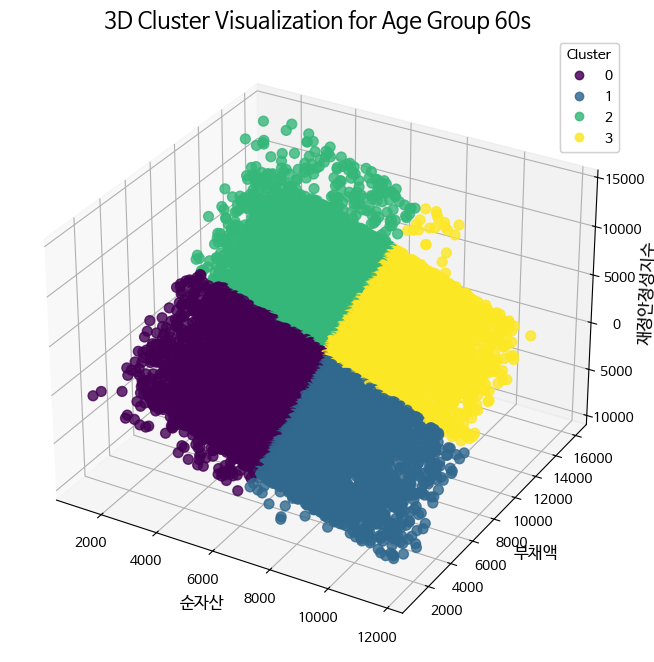

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to visualize clusters in 3D for each age group
def visualize_clusters_3d(age_group_data, age_group, features, cluster_col='Cluster'):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the 3D scatter plot
    scatter = ax.scatter(
        age_group_data[features[0]],
        age_group_data[features[1]],
        age_group_data[features[2]],
        c=age_group_data[cluster_col],
        cmap='viridis',
        s=50,
        alpha=0.8
    )

    # Setting labels and title
    ax.set_title(f'3D Cluster Visualization for Age Group {age_group}s', fontsize=16)
    ax.set_xlabel(features[0], fontsize=12)
    ax.set_ylabel(features[1], fontsize=12)
    ax.set_zlabel(features[2], fontsize=12)

    # Adding a legend for clusters
    legend = ax.legend(*scatter.legend_elements(), title="Cluster", fontsize=10)
    ax.add_artist(legend)

    plt.show()

# Visualize for each age group in 3D
for age_group, group_data in age_group_clusters.items():
    features_to_plot = ['순자산','부채액', '재정안정성지수']  # Features for 3D visualization
    visualize_clusters_3d(group_data, age_group, features_to_plot)

In [28]:
# prompt: 각 연령대별로 클러스터 군집에 몇개의 데이터가 있는지 결과 찍어줘.
# ex) 20대 cluster 0: @개, 20대 cluster 1: @개 이런식으로

# 각 연령대별 클러스터 개수 출력
for age_group, group_data in age_group_clusters.items():
    cluster_counts = group_data['Cluster'].value_counts()
    print(f"{int(age_group)}대")
    for cluster, count in cluster_counts.items():
        print(f"  Cluster {cluster}: {count}개")
    print("-" * 20)

20대
  Cluster 0: 6733개
  Cluster 1: 4528개
  Cluster 2: 4498개
  Cluster 3: 538개
--------------------
30대
  Cluster 0: 4490개
  Cluster 2: 4473개
  Cluster 3: 4451개
  Cluster 1: 4350개
--------------------
40대
  Cluster 2: 5136개
  Cluster 3: 4999개
  Cluster 0: 4949개
  Cluster 1: 4891개
--------------------
50대
  Cluster 0: 5625개
  Cluster 1: 5587개
  Cluster 2: 5334개
  Cluster 3: 5301개
--------------------
60대
  Cluster 0: 2850개
  Cluster 2: 2648개
  Cluster 3: 2515개
  Cluster 1: 2413개
--------------------


In [29]:
# prompt: 각 연령별 클러스터의 Centroid 값도 출력해줘

# 각 연령대별 클러스터의 Centroid 값 출력
for age_group, group_data in age_group_clusters.items():
    # Load the corresponding KMeans model
    model_filename = f"kmeans_model_age_group_{age_group}.pkl"
    with open(model_filename, 'rb') as file:
        kmeans = pickle.load(file)

    # Extract relevant columns for clustering
    clustering_data = group_data[['부채액', '순자산']]

    # Standardize the data (using the same scaler used for clustering)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clustering_data)

    # Centroids 데이터를 자연수로 변환
    centroids = pd.DataFrame(
        scaler.inverse_transform(kmeans.cluster_centers_),
        columns=clustering_data.columns
    )

    # Cluster 열 추가
    centroids['Cluster'] = centroids.index

    # 각 숫자를 자연수로 변환 (반올림 후 정수로 변환)
    centroids = centroids.round(0).astype(int)

    print(f"\n{int(age_group)}대 Centroid 값:",centroids)



20대 Centroid 값:      부채액   순자산  Cluster
0  10112  2585        0
1   4833  1884        1
2   4775  3320        2
3   9299  6205        3

30대 Centroid 값:     부채액   순자산  Cluster
0  4344  5670        0
1  9981  3392        1
2  9855  5763        2
3  4529  3336        3

40대 Centroid 값:      부채액   순자산  Cluster
0  14315  3905        0
1   6309  6536        1
2  14052  6574        2
3   6423  3880        3

50대 Centroid 값:      부채액   순자산  Cluster
0  12464  4737        0
1   5594  7862        1
2   5573  4621        2
3  12436  8008        3

60대 Centroid 값:      부채액   순자산  Cluster
0   4888  4909        0
1   4790  8442        1
2  11026  4904        2
3  10580  8416        3


## 20대의 클러스터링 결과가 매우 고르지 못함.

현실 데이터 반영을 위한 노이즈가 20대에 지나치게 집중된 것으로 추정.

20대에 한해서 이상치를 제거하고 다시 진행

In [30]:
# 20대 데이터 추출
age_20_data = age_group_clusters[20]

# 이상치 탐지 및 처리 (예: IQR 방법)
for col in ['순자산', '부채액', '재정안정성지수']:
    Q1 = age_20_data[col].quantile(0.25)
    Q3 = age_20_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치를 평균값으로 대체
    age_20_data.loc[(age_20_data[col] < lower_bound) | (age_20_data[col] > upper_bound), col] = age_20_data[col].mean()

# 20대 데이터를 업데이트된 데이터로 변경
age_group_clusters[20] = age_20_data

In [31]:
age_20_data.head()

,ID,비밀번호,성별,나이,직장,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),순자산,재정안정성지수,Age Group,Cluster
6,user7,1234,여자,20,Y,286,2269.875630,1356.0,913.875630,1375,9040.0,12684.875630,71.265973,3644.875630,5395.124370,20,0
9,user10,1234,여자,20,N,286,1824.605042,1090.0,734.605042,1708,2630.0,6162.605042,42.676757,3532.605042,-902.605042,20,2
11,user12,1234,여자,20,N,286,2551.099160,1524.0,1027.099160,1109,7160.0,10820.099160,66.173146,3660.099160,3499.900840,20,2
12,user13,1234,남자,20,Y,310,2276.571429,1360.0,916.571429,1543,6961.0,10780.571429,64.569861,3819.571429,3141.428571,20,2
15,user16,1234,여자,20,N,286,2217.983193,1325.0,892.983193,1379,7504.0,11100.983193,67.597616,3596.983193,3907.016807,20,2


연령대 20의 K-Means 모델이 저장되었습니다: kmeans_model_age_group_20.pkl


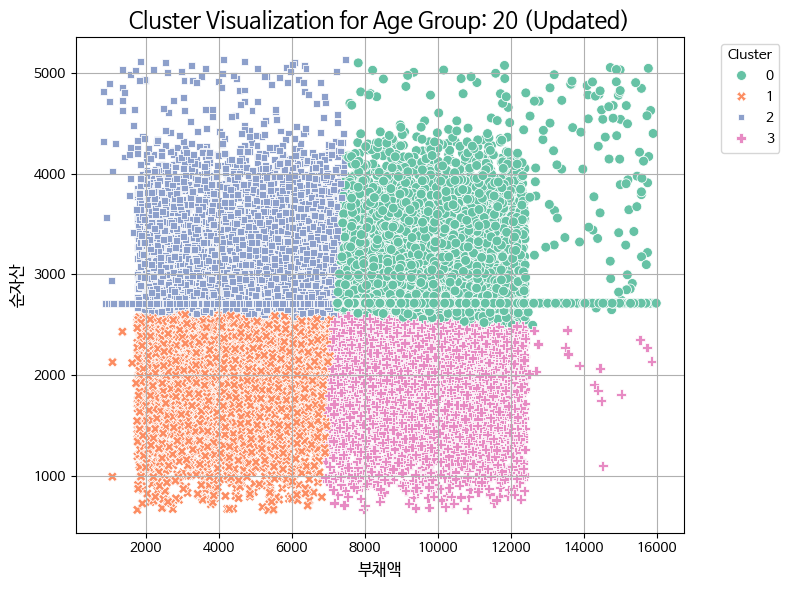

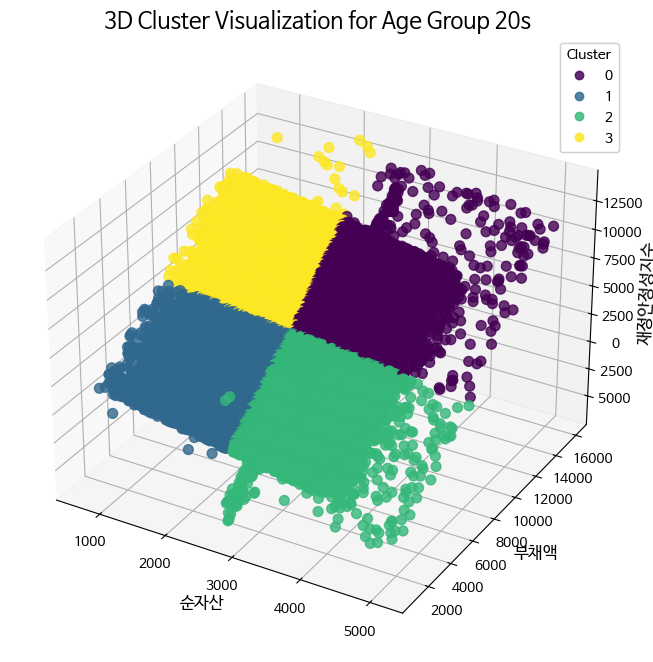

20대
  Cluster 2: 4352개
  Cluster 0: 4285개
  Cluster 1: 3868개
  Cluster 3: 3792개
--------------------

20대 Centroid 값:
      부채액   순자산  Cluster
0  10090  3199        0
1   4369  1927        1
2   4527  3263        2
3   9666  1878        3


In [32]:
clustering_data = age_20_data[['부채액', '순자산']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Perform K-Means clustering
kmeans_20 = KMeans(n_clusters=4, random_state=42, max_iter=1000, init='k-means++', n_init=20)
age_20_data['Cluster'] = kmeans_20.fit_predict(scaled_data)

# Update the age_group_clusters dictionary
age_group_clusters[20] = age_20_data

# Save the updated 20s model
model_filename = f"kmeans_model_age_group_20.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(kmeans_20, file)
print(f"연령대 20의 K-Means 모델이 저장되었습니다: {model_filename}")

# Calculate Silhouette score for the updated 20s cluster
clustering_features = age_20_data[['부채액', '순자산']]
cluster_labels = age_20_data['Cluster']
scaled_features = scaler.fit_transform(clustering_features)

# Visualize the updated clusters for the 20s age group
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=age_20_data,
    x='부채액',
    y='순자산',
    hue='Cluster',
    palette='Set2',
    style='Cluster',
    s=50
)
plt.title(f"Cluster Visualization for Age Group: 20 (Updated)", fontsize=16)
plt.xlabel('부채액', fontsize=12)
plt.ylabel('순자산', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

features_to_plot = ['순자산','부채액', '재정안정성지수']
visualize_clusters_3d(age_20_data, 20, features_to_plot)

# Print cluster counts and centroids for the updated 20s data
cluster_counts = age_20_data['Cluster'].value_counts()
print(f"20대")
for cluster, count in cluster_counts.items():
    print(f"  Cluster {cluster}: {count}개")
print("-" * 20)

centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans_20.cluster_centers_),
    columns=clustering_data.columns
)
centroids['Cluster'] = centroids.index
centroids = centroids.round(0).astype(int)

print(f"\n20대 Centroid 값:\n", centroids)

In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# ... (your existing code) ...

# Calculate Silhouette score for the updated 20s cluster
clustering_features = age_20_data[['부채액', '순자산']]
cluster_labels = age_20_data['Cluster']
scaled_features = scaler.fit_transform(clustering_features)

silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"20대 수정된 K-means 모델의 평균 실루엣 계수: {silhouette_avg:.4f}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(scaled_features, cluster_labels)
print(f"20대 수정된 K-means 모델의 Calinski-Harabasz Index: {calinski_harabasz:.4f}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_features, cluster_labels)
print(f"20대 수정된 K-means 모델의 Davies-Bouldin Index: {davies_bouldin:.4f}")

20대 수정된 K-means 모델의 평균 실루엣 계수: 0.3586
20대 수정된 K-means 모델의 Calinski-Harabasz Index: 12651.5030
20대 수정된 K-means 모델의 Davies-Bouldin Index: 0.8620


## 생성한 파생컬럼과 자본 대비 부채액을 기준으로 클러스터링 수행 + 하이퍼파라미터 튜닝

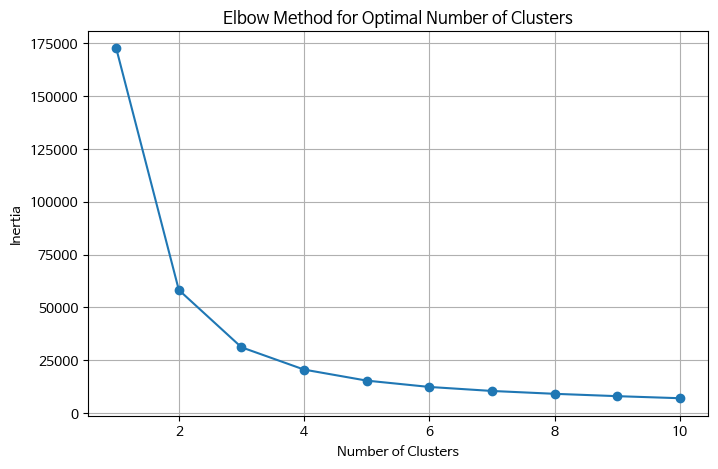

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract relevant columns for clustering
clustering_data = data[['재정안정성지수', '자본 대비 부채액(%)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# 연령대별로 클러스터링을 하기 위한 반복문 수행

for age_group in sorted(data['Age Group'].unique()):

    group_data = data[data['Age Group'] == age_group]

    # 피쳐 선택
    clustering_data = group_data[['재정안정성지수', '자본 대비 부채액(%)']]

    # 정규화 수행 -> 단위가 다르니까 StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clustering_data)

    # 클러스터링 수행
    kmeans_update = KMeans(n_clusters=2, random_state=42, max_iter=1000, init='k-means++', n_init=20)  # Using 3 clusters as an example
    group_data['Cluster'] = kmeans_update.fit_predict(scaled_data)

    # 결과 저장
    age_group_clusters[age_group] = group_data

    model_filename = f"Clustering_with_DerivedVariables_{age_group}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(kmeans, file)
    print(f"연령대 {age_group}의 Clustering_with_DerivedVariables: {model_filename}")

연령대 20의 Clustering_with_DerivedVariables: Clustering_with_DerivedVariables_20.pkl
연령대 30의 Clustering_with_DerivedVariables: Clustering_with_DerivedVariables_30.pkl
연령대 40의 Clustering_with_DerivedVariables: Clustering_with_DerivedVariables_40.pkl
연령대 50의 Clustering_with_DerivedVariables: Clustering_with_DerivedVariables_50.pkl
연령대 60의 Clustering_with_DerivedVariables: Clustering_with_DerivedVariables_60.pkl


In [36]:
from sklearn.metrics import silhouette_score

# 각 연령대에 대한 실루엣 점수를 저장할 딕셔너리
silhouette_scores = {}

# 각 연령대에 대해 실루엣 점수 계산
for age_group, group_data in age_group_clusters.items():
    # 클러스터링에 사용된 변수와 클러스터 레이블 추출
    clustering_features = group_data[['재정안정성지수', '자본 대비 부채액(%)']]
    cluster_labels = group_data['Cluster']

    # 데이터 표준화
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(clustering_features)

    # 실루엣 점수 계산
    if len(cluster_labels.unique()) > 1:  # 클러스터가 2개 이상인 경우에만 계산 가능
        silhouette_avg = silhouette_score(scaled_features, cluster_labels)
        silhouette_scores[age_group] = silhouette_avg
    else:
        silhouette_scores[age_group] = None  # 클러스터가 1개인 경우 점수 계산 불가

# 각 연령대에 대한 실루엣 점수 출력
for age_group, score in silhouette_scores.items():
    if score is not None:
        print(f"연령대 {age_group}의 실루엣 점수: {score:.4f}")
    else:
        print(f"연령대 {age_group}의 실루엣 점수: 계산 불가 (클러스터가 1개)")


연령대 20의 실루엣 점수: 0.5655
연령대 30의 실루엣 점수: 0.5695
연령대 40의 실루엣 점수: 0.5729
연령대 50의 실루엣 점수: 0.5746
연령대 60의 실루엣 점수: 0.5650


In [37]:
!pip install statsmodels

In [38]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 분석할 데이터 로드 또는 샘플 데이터 생성
# df = pd.read_csv('your_file.csv')  # 예: 데이터 파일 읽기
# 필요한 컬럼만 선택
selected_columns = ['재정안정성지수', '자본 대비 부채액(%)']
subset_df = data[selected_columns]

# VIF 계산을 위한 데이터 전처리 (숫자형 데이터만 선택)
numeric_df = subset_df.select_dtypes(include=[np.number])

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

vif_data

,feature,VIF
0,재정안정성지수,2.52089
1,자본 대비 부채액(%),2.52089


In [39]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 분석할 데이터 로드 또는 샘플 데이터 생성
# df = pd.read_csv('your_file.csv')  # 예: 데이터 파일 읽기
# 필요한 컬럼만 선택
selected_columns = ['순자산', '재정안정성지수']
subset_df = data[selected_columns]

# VIF 계산을 위한 데이터 전처리 (숫자형 데이터만 선택)
numeric_df = subset_df.select_dtypes(include=[np.number])

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

vif_data


,feature,VIF
0,순자산,1.252276
1,재정안정성지수,1.252276
